<CENTER>
  <header>
    <h1>Pandas for text mining</h1>
    <h3>April 5th, 2018</h3>
    <h2>Gianni Barlacchi</h2>
    <p></p>
  </header>
</CENTER>


# Outline

- Introduction to the Pandas data structures
- Exploratory Data Analysis with Pandas
- Case of study: Quora Dataset


# Why do you need pandas?

## Let's start with a showcase

### Case study: Read csv file and count the number of words.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

pd.options.display.max_rows = 8
%matplotlib inline

In [27]:
df = pd.read_csv("data/questions.csv")

In [29]:
df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
...,...,...,...,...,...,...
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [30]:
print("There are : " + str(len(df)) + " question pairs.")

There are : 404351 question pairs.


In [31]:
df = df.head(1000)

Let's count the occurrencies of each word.

In [32]:
def normalize(df):
    text = str(df['question1']) + " " + str(df['question2'])
    pattern = re.compile('[\W]+', re.UNICODE) # \W Matches any character which is not a word character.
    return pattern.sub(r' ', text.lower()).strip()
    
df.loc[:,"normalized_text"] = df.apply(normalize, axis=1)
#count = df['normalized_text'].str.split().apply(len).value_counts()

In [33]:
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,normalized_text
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,what is the step by step guide to invest in sh...
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,what is the story of kohinoor koh i noor diamo...
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,how can i increase the speed of my internet co...
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,why am i mentally very lonely how can i solve ...
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,which one dissolve in water quikly sugar salt ...


In [34]:
counts = pd.Series(' '.join(df['normalized_text']).split()).value_counts()
counts

the             905
what            779
is              604
i               582
               ... 
fd                1
83                1
rude              1
unscientific      1
Length: 3946, dtype: int64

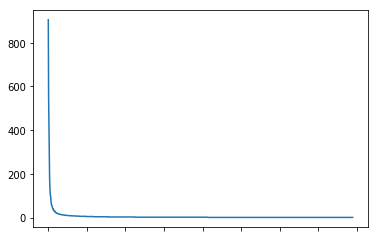

In [17]:
counts.plot(kind='bar')

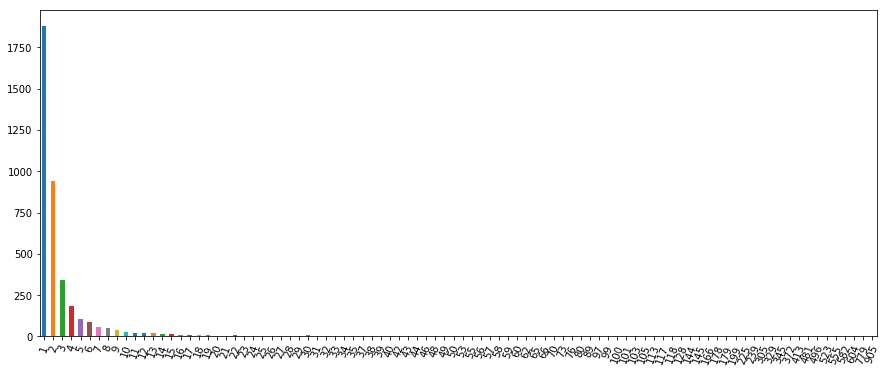

In [26]:
counts.groupby(counts).size().plot(kind='bar',figsize=[15,6], rot=70)

# Data analysis in python

When working with - tabular or structured data-, we need to:

- Import data
- Clean up messy data
- Explore data, gain insight into data
- Process and prepare your data for analysis
- Analyse your data together with other packages (e.g., scikit-learn)

## Pandas

For data-intensive work in Python the [Pandas](http://pandas.pydata.org) library has become essential.

What is ``pandas``?

* Pandas can be thought of as NumPy arrays with labels for rows and columns, and better support for heterogeneous data types, but it's also much, much more than that.
* Pandas can also be thought of as `R`'s `data.frame` in Python.
* Powerful for working with missing data, working with time series data, for reading and writing your data, for reshaping, grouping, merging your data, ...
* NumPy is the fundamental package for scientific computing with Python.

Documentations: http://pandas.pydata.org/pandas-docs/stable/ && http://www.numpy.org/

## Key features

* Fast, easy and flexible input/output for a lot of different data formats
* Working with missing data (`.dropna()`, `pd.isnull()`)
* Merging and joining (`concat`, `join`)
* Grouping: `groupby` functionality
* Reshaping (`stack`, `pivot`)
* Powerful time series manipulation (resampling, timezones, ..)
* Easy plotting

# Basic data structures

Pandas does this through two fundamental object types, both built upon NumPy arrays: the ``Series`` object, and the ``DataFrame`` object.

## Series

A Series is a basic holder for **one-dimensional labeled data**. It can be created much as a NumPy array is created:

In [7]:
s = pd.Series([0.1, 0.2, 0.3, 0.4])
s

0    0.1
1    0.2
2    0.3
3    0.4
dtype: float64

### Attributes of a Series: `index` and `values`

The series has a built-in concept of an **index**, which by default is the numbers *0* through *N - 1*

In [8]:
s.index

Int64Index([0, 1, 2, 3], dtype='int64')

You can access the underlying numpy array representation with the `.values` attribute:

In [9]:
s.values

array([ 0.1,  0.2,  0.3,  0.4])

We can access series values via the index, just like for NumPy arrays:

In [10]:
s[0]

0.10000000000000001

Unlike the NumPy array, though, this index can be something other than integers:

In [11]:
s2 = pd.Series(np.arange(4), index=['a', 'b', 'c', 'd'])
s2

a    0
b    1
c    2
d    3
dtype: int32

In [12]:
s2['c']

2

In this way, a ``Series`` object can be thought of as similar to an ordered dictionary mapping one typed value to another typed value:

In [37]:
words = pd.Series({'what': 4, 'when': 3, 'the': 3, 'how': 2, 'why': 2})
words

how     2
the     3
what    4
when    3
why     2
dtype: int64

In [38]:
words['what']
# Why this is possible?

4

We can index or slice the words as expected:

In [40]:
words['what']

4

In [41]:
words['what':'when']

what    4
when    3
dtype: int64

Many things you can do with numpy arrays, can also be applied on objects.

<br><br>

<center><i>How can we select words with occurrencies greater than 2?</i></center>

In [43]:
words[words > 2]

the     3
what    4
when    3
dtype: int64

A range of methods:

In [44]:
words.mean()

2.8

In [45]:
words.max()

4

### Alignment!

Only, pay attention to **alignment**: operations between series will align on the index:  

In [46]:
s1 = words[['what', 'when']]
s2 = words[['how', 'when']]

In [47]:
s1

what    4
when    3
dtype: int64

In [64]:
s1 + s2

how     NaN
what    NaN
when    6.0
dtype: float64

In [49]:
s1 + s2

how     NaN
what    NaN
when    6.0
dtype: float64

## DataFrames: Multi-dimensional Data

A DataFrame is a **tablular data structure** (multi-dimensional object to hold labeled data) comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can think of it as multiple Series object which share the same index.


One of the most common ways of creating a dataframe is from a dictionary of arrays or lists( or read from csv ;) )

In [51]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data)
countries

,area,capital,country,population
0,30510,Brussels,Belgium,11.3
1,671308,Paris,France,64.3
2,357050,Berlin,Germany,81.3
3,41526,Amsterdam,Netherlands,16.9
4,244820,London,United Kingdom,64.9


### Attributes of the DataFrame

A DataFrame has besides a `index` attribute, also a `columns` attribute:

In [52]:
countries.index

RangeIndex(start=0, stop=5, step=1)

In [53]:
countries.columns

Index([u'area', u'capital', u'country', u'population'], dtype='object')

To check the data types of the different columns:

In [54]:
countries.dtypes

area            int64
capital        object
country        object
population    float64
dtype: object

An overview of that information can be given with the `info()` method:

In [55]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
area          5 non-null int64
capital       5 non-null object
country       5 non-null object
population    5 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 232.0+ bytes


Also a DataFrame has a `values` attribute, but attention: when you have heterogeneous data, all values will be upcasted:

In [56]:
countries.values

array([[30510, 'Brussels', 'Belgium', 11.3],
       [671308, 'Paris', 'France', 64.3],
       [357050, 'Berlin', 'Germany', 81.3],
       [41526, 'Amsterdam', 'Netherlands', 16.9],
       [244820, 'London', 'United Kingdom', 64.9]], dtype=object)

If we don't like what the index looks like, we can reset it and set one of our columns:

In [57]:
countries = countries.set_index('country')
countries

,area,capital,population
country,,,
Belgium,30510,Brussels,11.3
France,671308,Paris,64.3
Germany,357050,Berlin,81.3
Netherlands,41526,Amsterdam,16.9
United Kingdom,244820,London,64.9


To access a Series representing a column in the data, use typical indexing syntax:

In [58]:
countries['area']

country
Belgium            30510
France            671308
Germany           357050
Netherlands        41526
United Kingdom    244820
Name: area, dtype: int64

As you play around with DataFrames, you'll notice that many operations which work on NumPy arrays will also work on dataframes.

Let's compute density of each country:

In [59]:
countries['population']*1000000 / countries['area']

country
Belgium           370.370370
France             95.783158
Germany           227.699202
Netherlands       406.973944
United Kingdom    265.092721
dtype: float64

Adding a new column to the dataframe is very simple:

In [60]:
countries['density'] = countries['population'] * 1000000 / countries['area']
countries

,area,capital,population,density
country,,,,
Belgium,30510,Brussels,11.3,370.370370
France,671308,Paris,64.3,95.783158
Germany,357050,Berlin,81.3,227.699202
Netherlands,41526,Amsterdam,16.9,406.973944
United Kingdom,244820,London,64.9,265.092721


We can use masking to select certain data:

In [65]:
countries[(countries['density'] > 300) & (countries['population'] == 11.3)]

,area,capital,population,density
country,,,,
Belgium,30510,Brussels,11.3,370.37037


Sort the dataframe and get the first two row.

In [66]:
countries.sort_values(by=['density','area'], ascending=False, inplace=True)
countries.iloc[0:2]

,area,capital,population,density
country,,,,
Netherlands,41526,Amsterdam,16.9,406.973944
Belgium,30510,Brussels,11.3,370.370370


One useful method to use is the ``describe`` method, which computes summary statistics for each column:

In [38]:
countries.describe()

,area,population,density
count,5.000000,5.000000,5.000000
mean,269042.800000,47.740000,273.183879
std,264012.827994,31.519645,123.440607
min,30510.000000,11.300000,95.783158
25%,41526.000000,16.900000,227.699202
50%,244820.000000,64.300000,265.092721
75%,357050.000000,64.900000,370.370370
max,671308.000000,81.300000,406.973944


## Some notes on selecting data

One of pandas' basic features is the labeling of rows and columns, but this makes indexing also a bit more complex compared to numpy. We now have to distuinguish between:

- selection by label
- selection by position.

For a DataFrame, basic indexing selects the columns.

Selecting a single column:

In [43]:
countries['area']

country
Belgium            30510
France            671308
Germany           357050
Netherlands        41526
United Kingdom    244820
Name: area, dtype: int64

or multiple columns:

In [44]:
countries[['area', 'density']]

,area,density
country,,
Belgium,30510,370.370370
France,671308,95.783158
Germany,357050,227.699202
Netherlands,41526,406.973944
United Kingdom,244820,265.092721


But, slicing accesses the rows:

In [45]:
countries['France':'Netherlands']

,area,capital,population,density
country,,,,
France,671308,Paris,64.3,95.783158
Germany,357050,Berlin,81.3,227.699202
Netherlands,41526,Amsterdam,16.9,406.973944


For more advanced indexing, you have some extra attributes:
    
* `loc`: selection by label
* `iloc`: selection by position

In [67]:
countries.loc['Germany', 'area'] # selecting by label

357050

Selecting by position with `iloc` works similar as indexing numpy arrays:

In [50]:
countries.iloc[0:2,1:3]

,capital,population
country,,
Belgium,Brussels,11.3
France,Paris,64.3


The different indexing methods can also be used to assign data:

In [ ]:
countries.loc['Belgium':'Germany', 'population'] = 10

In [ ]:
countries

# Further reading

- The original documentation: http://pandas.pydata.org/pandas-docs/stable/
- McKinney's book "Python for Data Analysis"
- On-line tutorials http://github.com/jvns/pandas-cookbook
- Kaggle Learn platform https://www.kaggle.com/learn/overview contains a specific course on Pandas!

# Time to pratice!
### See the next notebook quora_dataset